In [2]:
import os
import glob
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
final_df = pd.read_csv('summary_stats_optiver.csv')
final_df

,Unnamed: 0,minimum,q1,median,q3,maximum,mean,stdev,variance
0,0,0.000055,0.000429,0.000425,0.000421,0.010473,0.000572,0.000530,0.000530
1,1,0.000124,0.000626,0.000621,0.000616,0.007454,0.000812,0.000595,0.000595
2,2,0.000147,0.000721,0.000730,0.000737,0.010426,0.001001,0.000848,0.000848
3,3,0.000092,0.000443,0.000436,0.000431,0.008108,0.000616,0.000553,0.000553
4,4,0.000117,0.000801,0.000793,0.000785,0.013530,0.001039,0.000805,0.000805
...,...,...,...,...,...,...,...,...,...
107,107,0.000065,0.000419,0.000418,0.000418,0.007870,0.000561,0.000474,0.000474
108,108,0.000052,0.001033,0.001045,0.001060,0.011004,0.001358,0.000994,0.000994
109,109,0.000177,0.000775,0.000778,0.000783,0.007031,0.000988,0.000687,0.000687
110,110,0.000152,0.000836,0.000845,0.000855,0.007433,0.001064,0.000727,0.000727


In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(final_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df

,0,1,2,3,4,5,6,7,8
0,-1.716654,-1.310124,-1.066810,-1.082549,-1.093726,0.753861,-1.074796,-0.684618,-0.684618
1,-1.685724,0.185500,-0.189925,-0.215122,-0.237012,-0.364240,-0.194465,-0.316574,-0.316574
2,-1.654793,0.679892,0.230490,0.269618,0.300335,0.736686,0.498035,1.105853,1.105853
3,-1.623862,-0.517347,-1.005517,-1.032527,-1.051701,-0.122034,-0.913132,-0.556544,-0.556544
4,-1.592932,0.036362,0.586465,0.550018,0.510454,1.886189,0.637422,0.866732,0.866732
...,...,...,...,...,...,...,...,...,...
107,1.592932,-1.097200,-1.112821,-1.110545,-1.107102,-0.209971,-1.116015,-0.999712,-0.999712
108,1.623862,-1.381722,1.618437,1.664705,1.722472,0.950468,1.805868,1.930399,1.930399
109,1.654793,1.346478,0.470221,0.482033,0.500025,-0.520779,0.448613,0.197337,0.197337
110,1.685724,0.791031,0.741204,0.780437,0.818379,-0.371983,0.727332,0.426724,0.426724


In [6]:
kmeans = KMeans(init="random", n_clusters = 5, n_init=10, max_iter=300, random_state=42)
kmeans.fit(scaled_df)

KMeans(init='random', n_clusters=5, n_init=10, random_state=42)

In [7]:
kmeans.inertia_
kmeans.cluster_centers_
kmeans.n_iter_
kmeans.labels_[:128]

array([4, 4, 2, 4, 2, 1, 2, 4, 4, 4, 3, 3, 3, 4, 3, 1, 4, 4, 3, 4, 1, 2,
       4, 3, 4, 4, 1, 3, 4, 4, 3, 3, 4, 4, 2, 1, 3, 0, 3, 4, 4, 4, 1, 4,
       4, 1, 1, 1, 3, 2, 4, 4, 1, 3, 1, 3, 4, 2, 1, 1, 4, 1, 0, 1, 1, 2,
       3, 4, 3, 2, 0, 2, 1, 1, 3, 2, 0, 1, 3, 2, 3, 2, 2, 0, 2, 2, 4, 3,
       1, 3, 3, 1, 4, 3, 1, 3, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 0, 3,
       3, 1], dtype=int32)

In [9]:
pca_optiver = PCA(n_components=2)
principle_components = pca_optiver.fit_transform(scaled_df)

In [10]:
pca_optiver.explained_variance_

array([6.3079295 , 1.10812961])

In [11]:
pd.DataFrame(principle_components)

,0,1
0,-2.500882,1.637951
1,-0.737380,-0.203258
2,1.517873,0.816783
3,-2.265161,0.641597
4,1.810311,1.678938
...,...,...
107,-2.660458,0.306128
108,4.121399,1.158876
109,1.240717,-1.372817
110,1.770740,-1.065498


In [12]:
pca_optiver.explained_variance_ratio_

array([0.69462319, 0.12202618])

In [13]:
pca_stocks_df = pd.DataFrame(data = principle_components
             , columns = ['principal component 1', 'principal component 2'])
pca_stocks_df

,principal component 1,principal component 2
0,-2.500882,1.637951
1,-0.737380,-0.203258
2,1.517873,0.816783
3,-2.265161,0.641597
4,1.810311,1.678938
...,...,...
107,-2.660458,0.306128
108,4.121399,1.158876
109,1.240717,-1.372817
110,1.770740,-1.065498


In [14]:
pca_stocks_df['cluster'] = pd.Series(kmeans.labels_, index=pca_stocks_df.index)
pca_stocks_df

,principal component 1,principal component 2,cluster
0,-2.500882,1.637951,4
1,-0.737380,-0.203258,4
2,1.517873,0.816783,2
3,-2.265161,0.641597,4
4,1.810311,1.678938,2
...,...,...,...
107,-2.660458,0.306128,1
108,4.121399,1.158876,0
109,1.240717,-1.372817,3
110,1.770740,-1.065498,3


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

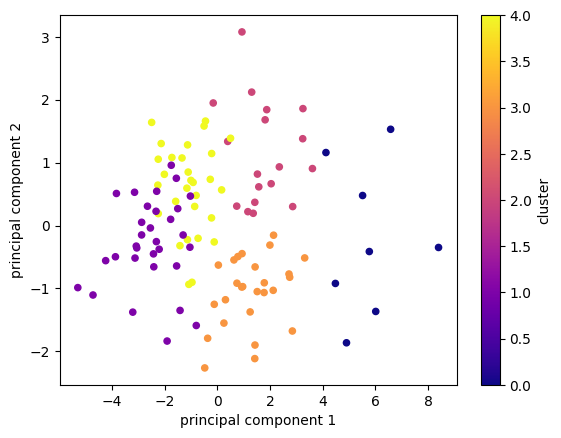

In [15]:
pca_stocks_df.plot.scatter(x='principal component 1',y='principal component 2', c='cluster', colormap='plasma')

In [39]:
pca_stocks_df

,principal component 1,principal component 2,cluster
0,-2.500882,1.637951,2
1,-0.737380,-0.203258,2
2,1.517873,0.816783,1
3,-2.265161,0.641597,2
4,1.810311,1.678938,1
...,...,...,...
107,-2.660458,0.306128,2
108,4.121399,1.158876,0
109,1.240717,-1.372817,1
110,1.770740,-1.065498,1
